In [188]:
# Control your blood pressure. High blood pressure is a major risk factor for stroke.
# Control your cholesterol. High cholesterol is another major risk factor for stroke
# Quit smoking. Smoking is a major risk factor for stroke. If you smoke, quitting is the best thing you can do to reduce your risk.
#Maintain a healthy weight. Obesity is a risk factor for stroke. Maintaining a healthy weight by eating a healthy diet and exercising regularly can help you reduce your risk.
#Get regular exercise. Exercise can help you control your blood pressure, cholesterol, and weight, all of which are risk factors for stroke.

In [ ]:
# Yes, age does have an impact on strokes. The risk of stroke increases with age. 
# According to the Centers for Disease Control and Prevention (CDC), the age-adjusted stroke death rate in the United States is 16.6 per 100,000 people. This means that about 1 in 620 people will die from a stroke each year. The stroke death rate is highest among people aged 65 and older.

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
# discrete vars = gender , ever_married , work_type , residence_type, smoking_status,
# continoous vars = id , age , hypertension,heart_disease,avg_glucose_level,bmi,stroke

In [7]:
# handle the missing values
missing_values = data.isnull().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
#get total_cells
total_cells = np.product(data.shape)
total_missing_cells = missing_values.sum()

print(total_cells)
print(total_missing_cells)



61320
201


In [9]:
percentage_missing = (total_missing_cells/total_cells) * 100
print(percentage_missing)

0.32778864970645794


In [10]:
mean_bmi = data['bmi'].mean()

print(mean_bmi)

28.893236911794666


In [11]:
data['bmi'].fillna(value=mean_bmi, inplace=True)

In [12]:
missing_values = data.isnull().sum()
print(missing_values)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [13]:
# no missing values now 

In [14]:
data['bmi_cat'] = pd.cut(data['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])

In [15]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obesity
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Overweight
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Obesity
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Obesity
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Overweight


<Axes: xlabel='bmi_cat', ylabel='bmi'>

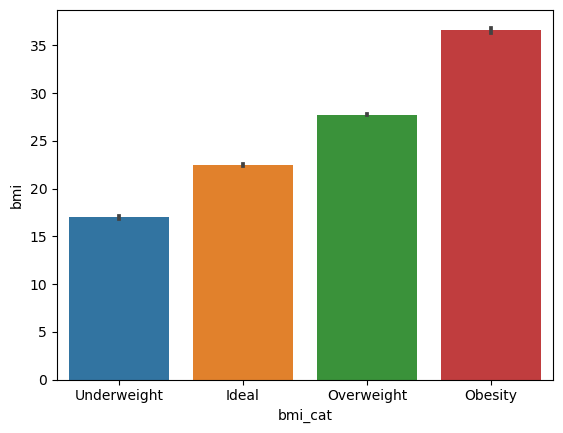

In [16]:
sns.barplot(y=data['bmi'] ,x=data['bmi_cat'])

In [17]:
data["bmi_cat"].describe()

count        5110
unique          4
top       Obesity
freq         1893
Name: bmi_cat, dtype: object

In [18]:
data['age_cat'] = pd.cut(data['age'], bins = [0, 11, 17,40,65,10000], labels = ['Child', 'Teen', 'adult', 'mid_adult','elderly'])

<Axes: xlabel='age_cat', ylabel='age'>

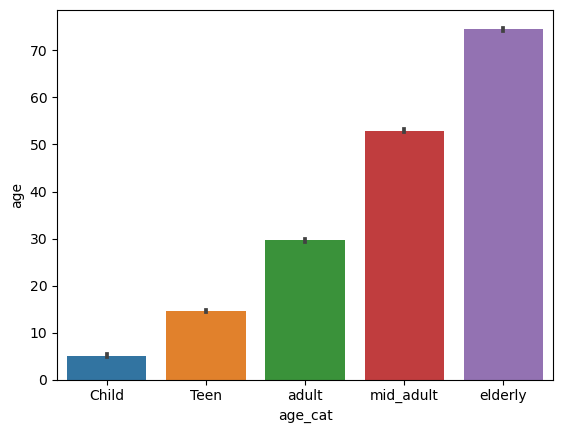

In [19]:
sns.barplot(y=data['age'] ,x=data['age_cat'])

In [20]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity,elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,mid_adult
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity,elderly
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obesity,mid_adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal,elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Overweight,elderly
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Obesity,elderly
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Obesity,adult
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Overweight,mid_adult


In [21]:
data['glucose_cat'] = pd.cut(data['avg_glucose_level'], bins = [0, 100, 125,10000], labels = ['normal', 'prediabetes', 'diabetes'])

<Axes: xlabel='glucose_cat', ylabel='avg_glucose_level'>

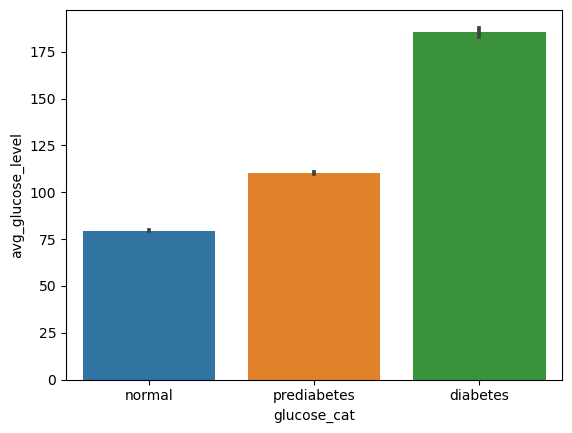

In [22]:
sns.barplot(y=data['avg_glucose_level'] ,x=data['glucose_cat'])

In [38]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity,elderly,diabetes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,mid_adult,diabetes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Obesity,elderly,prediabetes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Obesity,mid_adult,diabetes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal,elderly,diabetes


In [24]:
data['stroke'].describe()

count    5110.000000
mean        0.048728
std         0.215320
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

<Axes: xlabel='age_cat', ylabel='stroke'>

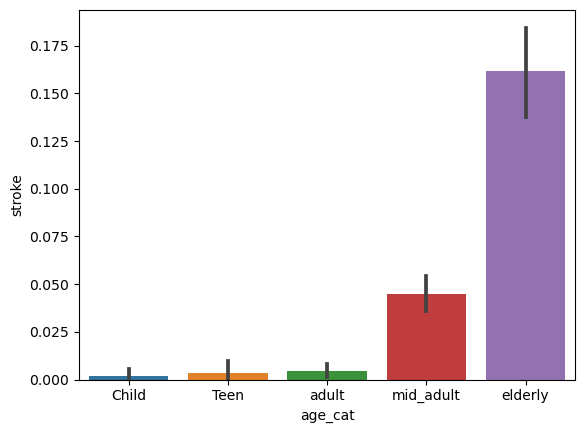

In [25]:
sns.barplot(y = data["stroke"],x= data['age_cat'])

In [26]:
# elderly people have stroke , then this cases increases with the age 

In [27]:
#it seems it doesn't matter female or male but the most cases male has the many strokes 

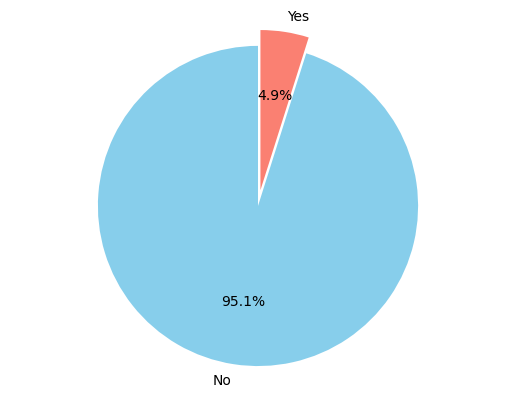

In [64]:
# Count unique values in the 'stroke' column
stroke_counts = data['stroke'].value_counts()

# Create a pie chart
plt.pie(stroke_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode = (0.1, 0))


# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [29]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_cat', 'age_cat', 'glucose_cat'],
      dtype='object')

<Axes: xlabel='gender', ylabel='stroke'>

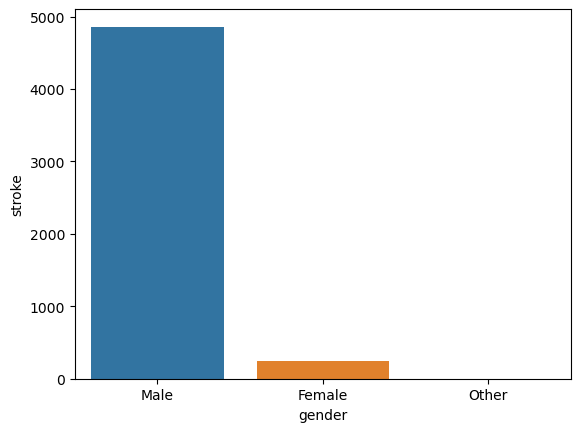

In [56]:
sns.barplot(y = stroke_counts , x= data["gender"])

In [ ]:
#male has more than female to get stroke 

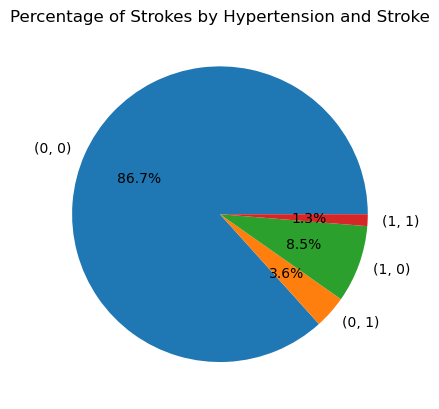

In [61]:
x_stroke_counts = data.groupby(['hypertension', 'stroke'])['stroke'].count()

total_strokes = x_stroke_counts.sum()

pie_chart_data = x_stroke_counts.values / total_strokes * 100
pie_chart_labels = x_stroke_counts.index.to_numpy()

plt.pie(pie_chart_data, labels=pie_chart_labels, autopct="%1.1f%%")
plt.title("Percentage of Strokes by Hypertension and Stroke")
plt.show()

In [62]:
#so that it is not to much related to each others 

<Axes: xlabel='ever_married', ylabel='stroke'>

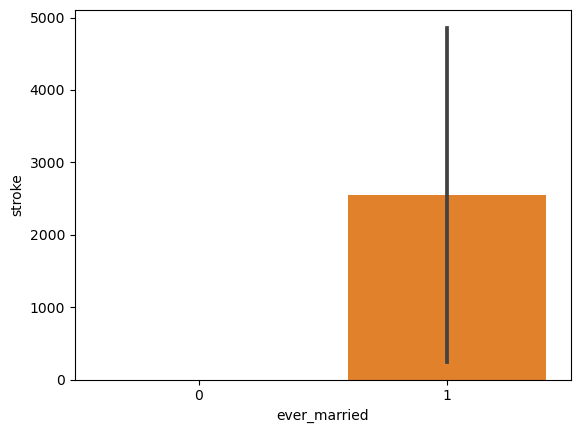

In [183]:
sns.barplot(y = stroke_counts , x= data["ever_married"])

In [73]:
data["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [76]:
# so if you married u will get it no worries 

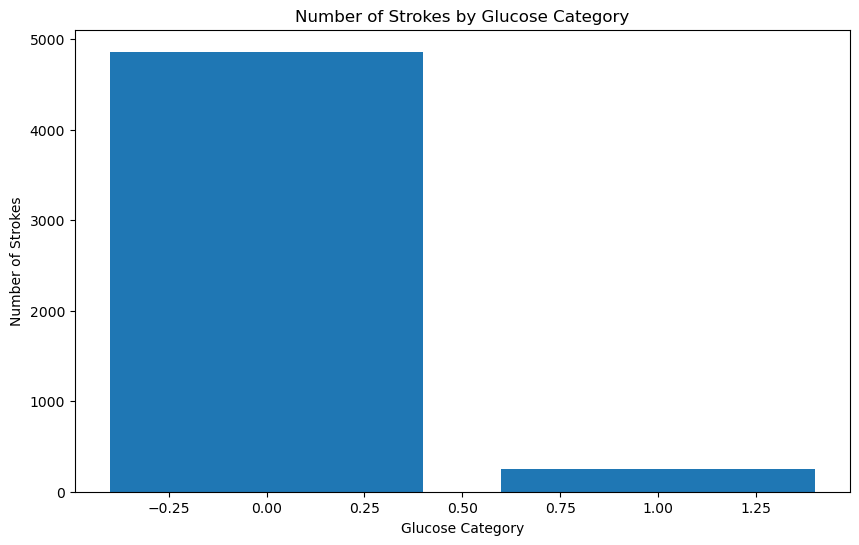

<Axes: xlabel='glucose_cat', ylabel='stroke'>

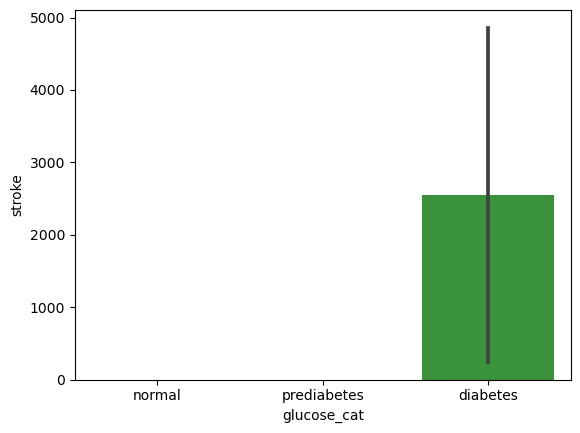

In [81]:
sns.barplot(y = stroke_counts , x= data["glucose_cat"])

In [86]:
new = data.groupby(['glucose_cat', 'stroke'])['stroke'].count()

In [ ]:
#i can use heatmap for correltion ? 

C:\Users\haazm\AppData\Local\Temp\ipykernel_6760\963246495.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


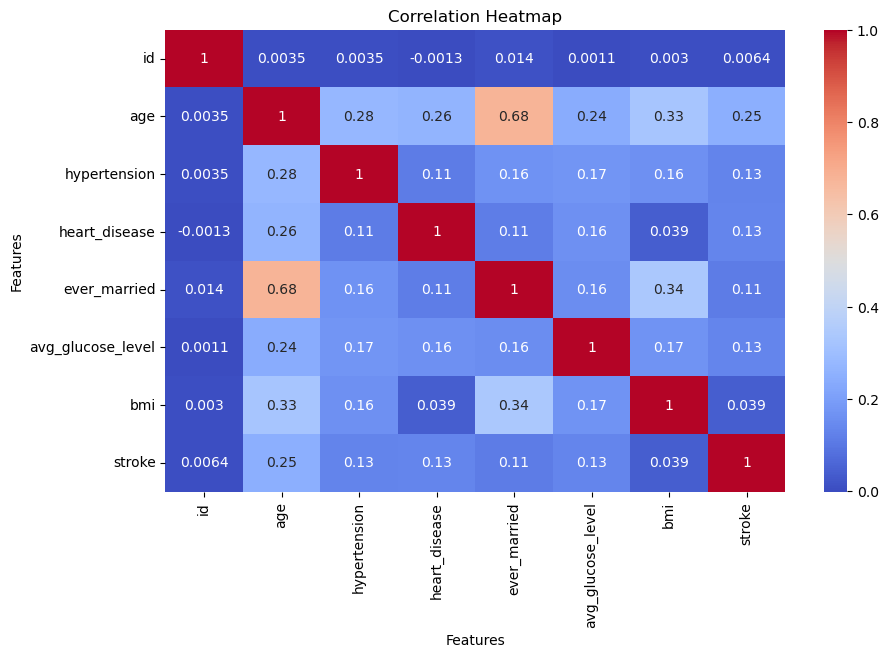

In [97]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap")
plt.show()

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  bmi_cat            5110 non-null   category
 13  age_cat            5110 non-null   category
 14  glucose_cat        5110 non-null   category
dtypes: category(3), float64(3), int64(4), object(5)
memory 

In [91]:
obj_types = data.select_dtypes(include=['O', 'category'])

In [102]:
obj_types

,gender,ever_married,work_type,Residence_type,smoking_status,bmi_cat,age_cat,glucose_cat
0,Male,Yes,Private,Urban,formerly smoked,Obesity,elderly,diabetes
1,Female,Yes,Self-employed,Rural,never smoked,Overweight,mid_adult,diabetes
2,Male,Yes,Private,Rural,never smoked,Obesity,elderly,prediabetes
3,Female,Yes,Private,Urban,smokes,Obesity,mid_adult,diabetes
4,Female,Yes,Self-employed,Rural,never smoked,Ideal,elderly,diabetes
...,...,...,...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked,Overweight,elderly,normal
5106,Female,Yes,Self-employed,Urban,never smoked,Obesity,elderly,diabetes
5107,Female,Yes,Self-employed,Rural,never smoked,Obesity,adult,normal
5108,Male,Yes,Private,Rural,formerly smoked,Overweight,mid_adult,diabetes


In [94]:
ever_married_mapping = {'Yes' : 1, 'No' : 0}
data['ever_married'] = data['ever_married'].map(ever_married_mapping)
data[['ever_married']]

,ever_married
0,1
1,1
2,1
3,1
4,1
...,...
5105,1
5106,1
5107,1
5108,1


In [95]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1,Obesity,elderly,diabetes
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,never smoked,1,Overweight,mid_adult,diabetes
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,never smoked,1,Obesity,elderly,prediabetes
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,smokes,1,Obesity,mid_adult,diabetes
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1,Ideal,elderly,diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,28.893237,never smoked,0,Overweight,elderly,normal
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0,Obesity,elderly,diabetes
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0,Obesity,adult,normal
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0,Overweight,mid_adult,diabetes


In [96]:
data['ever_married'].value_counts()


1    3353
0    1757
Name: ever_married, dtype: int64

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data[['gender']]

#[1 for male ,0 for female]

,gender
0,1
1,0
2,1
3,0
4,0
...,...
5105,0
5106,0
5107,0
5108,1


In [113]:
obj_types = [column for column in data.columns if data[column].dtype == "object" or data[column].dtype == "category" ]

In [114]:
obj_types

['work_type',
 'Residence_type',
 'smoking_status',
 'bmi_cat',
 'age_cat',
 'glucose_cat']

In [115]:
data["age_cat"].dtype

CategoricalDtype(categories=['Child', 'Teen', 'adult', 'mid_adult', 'elderly'], ordered=True)

In [117]:
for column in obj_types:
    data[column] = encoder.fit_transform(data[column])

print(data.head())

data

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  \
0               1             228.69  36.600000               1       1   
1               0             202.21  28.893237               2       1   
2               0             105.92  32.500000               2       1   
3               1             171.23  34.400000               3       1   
4               0             174.12  24.000000               2       1   

   bmi_cat  age_cat  glucose_cat  
0        1        3            0 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,1,3,0
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,2,4,0
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,1,3,2
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,1,4,0
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0,2,3,1
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0,1,3,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0,1,2,1
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0,2,4,0


In [118]:
data.select_dtypes(include=['O', 'category']).columns

Index([], dtype='object')

In [119]:
#no more strings 

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [122]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])

In [123]:
scaled_data

array([[ 1.05143428e+00,  2.70637544e+00,  1.00123401e+00],
       [ 7.86070073e-01,  2.12155854e+00,  4.61555355e-16],
       [ 1.62639008e+00, -5.02830130e-03,  4.68577254e-01],
       ...,
       [-3.63841511e-01, -5.11442636e-01,  2.21736316e-01],
       [ 3.43796387e-01,  1.32825706e+00, -4.27845098e-01],
       [ 3.42048064e-02, -4.60867458e-01, -3.49895329e-01]])

In [126]:
scaled_data = scaler.fit_transform(data[:])

In [127]:
scaled_data

array([[-1.29831203,  1.18807255,  1.05143428, ..., -0.26836734,
         0.25927179, -1.60032641],
       [ 0.71637149, -0.840344  ,  0.78607007, ...,  0.8411449 ,
         1.01982223, -1.60032641],
       [-0.25547819,  1.18807255,  1.62639008, ..., -0.26836734,
         0.25927179,  1.61353406],
       ...,
       [-0.79371959, -0.840344  , -0.36384151, ..., -0.26836734,
        -0.50127864,  0.00660382],
       [ 0.04849658,  1.18807255,  0.34379639, ...,  0.8411449 ,
         1.01982223, -1.60032641],
       [ 0.38569496, -0.840344  ,  0.03420481, ...,  0.8411449 ,
         1.01982223,  0.00660382]])

In [162]:
y= data['stroke']

In [163]:
x=data[['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'bmi_cat', 'age_cat', 'glucose_cat']]

In [164]:
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)

In [168]:
from sklearn.linear_model import LogisticRegression
X_train
y_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_cat,age_cat,glucose_cat
2402,37655,1,45.0,0,0,1,2,0,83.91,40.2,0,1,4,1
2438,61010,0,60.0,0,0,1,2,1,114.34,30.3,3,1,4,2
4107,28435,0,59.0,0,0,1,3,1,77.60,23.4,0,0,4,1
3361,62076,1,48.0,0,0,1,2,0,62.89,29.6,0,2,4,1
1154,56245,0,21.0,0,0,0,2,1,112.07,28.2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,6540,0,41.0,0,0,1,2,0,93.67,35.9,0,1,4,1
1099,23565,1,34.0,0,0,1,2,1,85.57,26.8,0,2,2,1
2514,70625,1,18.0,0,0,0,2,1,79.35,23.6,0,0,2,1
3606,14872,1,45.0,1,0,1,3,0,239.19,52.5,0,1,4,0


In [171]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [186]:
y_pred = logistic_model.predict(X_test)
y_pred
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.95146771037182


In [181]:
import pickle

with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)